### Import libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Load processed dataset

In [3]:
path = '../data/bank-additional-full-processed.csv'
df = pd.read_csv(path,delimiter=',')
df.head()

,age,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,5,1,1,1.1,93.994,-36.4,4.857,5191.0,-1,...,0,1,0,1,0,0,1,0,1,0
1,57,5,1,1,1.1,93.994,-36.4,4.857,5191.0,-1,...,0,1,0,1,0,0,1,0,1,0
2,37,5,1,1,1.1,93.994,-36.4,4.857,5191.0,-1,...,0,0,1,1,0,0,1,0,1,0
3,40,5,1,1,1.1,93.994,-36.4,4.857,5191.0,-1,...,0,1,0,1,0,0,1,0,1,0
4,56,5,1,1,1.1,93.994,-36.4,4.857,5191.0,-1,...,0,1,0,0,1,0,1,0,1,0


### Split data into train and test sets

In [4]:
# Predictors
x = df.drop(['y'], 1)

# Target values
y = df['y']

# Divide into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Fit a logistic regression model

ROC_AUC_SCORE is 0.5899745251566824
Classification Report:
             precision    recall  f1-score   support

         -1       0.91      0.98      0.94      7303
          1       0.60      0.20      0.30       935

avg / total       0.87      0.89      0.87      8238



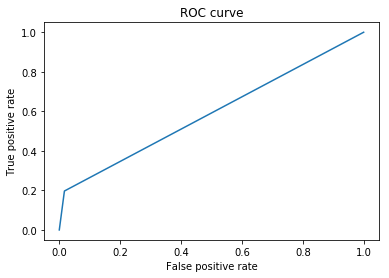

In [5]:
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on test set
y_scores = model.predict(x_test)

auc = roc_auc_score(y_test, y_scores)
print(f'ROC_AUC_SCORE is {auc}')
print('Classification Report:')
print(classification_report(y_test, y_scores))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

### Fit a decision tree model

ROC_AUC_SCORE is 0.6117102999939223
Classification Report:
             precision    recall  f1-score   support

         -1       0.91      0.90      0.91      7303
          1       0.29      0.32      0.31       935

avg / total       0.84      0.83      0.84      8238



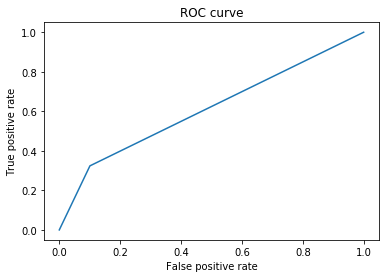

In [7]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Predict on test set
y_scores = model.predict(x_test)

auc = roc_auc_score(y_test, y_scores)
print(f'ROC_AUC_SCORE is {auc}')
print('Classification Report:')
print(classification_report(y_test, y_scores))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6007621217857141
Classification Report:
             precision    recall  f1-score   support

         -1       0.91      0.97      0.94      7303
          1       0.49      0.23      0.32       935

avg / total       0.86      0.88      0.87      8238



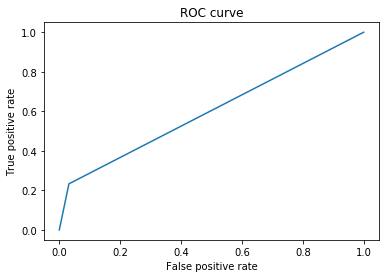

In [11]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Predict on test set
y_scores = model.predict(x_test)

auc = roc_auc_score(y_test, y_scores)
print(f'ROC_AUC_SCORE is {auc}')
print('Classification Report:')
print(classification_report(y_test, y_scores))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6067444995500347
Classification Report:
             precision    recall  f1-score   support

         -1       0.91      0.98      0.94      7303
          1       0.63      0.23      0.34       935

avg / total       0.88      0.90      0.88      8238



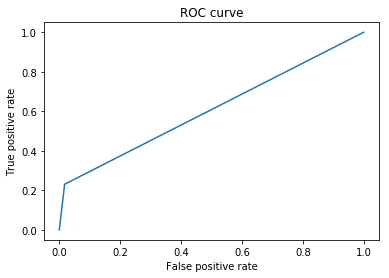

In [15]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

# Predict on test set
y_scores = model.predict(x_test)

auc = roc_auc_score(y_test, y_scores)
print(f'ROC_AUC_SCORE is {auc}')
print('Classification Report:')
print(classification_report(y_test, y_scores))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

### Baseline algorithms

Let us run some baseline algorithms with default hyper-parameters on the training data to see how they perform. We will consider the following algorithms: **Logistic regression**, **Random forest**, **Support vector machine**, **k-Nearest neighbor** and **Decision tree**. For each algorithm, we will perform 10-fold cross-validation on the training set and store the mean classification accuracy and mean AUC-ROC (Area under ROC curve) along with the standard deviations.

In [21]:
# Make a list of algorithms to implement
models = []
models.append(('Logistic regression', LogisticRegression()))
models.append(('Random forest', RandomForestClassifier()))
models.append(('Support vector machine', SVC()))
models.append(('k-Nearest neighbor', KNeighborsClassifier()))
models.append(('Decision tree', DecisionTreeClassifier()))

In [22]:
# Make a dataframe to store classification metrics
col = ['Algorithm', 'Mean AUC-ROC', 'S.D. AUC-ROC', 'Mean Accuracy', 'S.D. Accuracy']
